In [12]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

sample1 = cv2.imread("hw4_sample_images\sample1.png", cv2.IMREAD_GRAYSCALE)
sample2 = cv2.imread("hw4_sample_images\sample2.png", cv2.IMREAD_GRAYSCALE)
sample3 = cv2.imread("hw4_sample_images\sample3.png", cv2.IMREAD_GRAYSCALE)

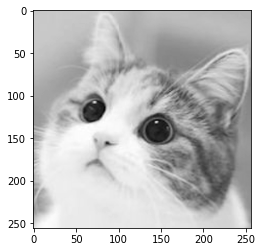

In [2]:
plt.imshow(sample1, cmap='gray')

In [3]:
I2 = np.array([[1, 2], [3, 0]], dtype = 'uint8')
N = len(I2)
threshold = 255 * (I2 + 0.5) / (N * N)
threshold

array([[ 95.625, 159.375],
       [223.125,  31.875]])

In [4]:
h, w = sample1.shape
threshold = np.tile(threshold, (h//N, w//N))
threshold

array([[ 95.625, 159.375,  95.625, ..., 159.375,  95.625, 159.375],
       [223.125,  31.875, 223.125, ...,  31.875, 223.125,  31.875],
       [ 95.625, 159.375,  95.625, ..., 159.375,  95.625, 159.375],
       ...,
       [223.125,  31.875, 223.125, ...,  31.875, 223.125,  31.875],
       [ 95.625, 159.375,  95.625, ..., 159.375,  95.625, 159.375],
       [223.125,  31.875, 223.125, ...,  31.875, 223.125,  31.875]])

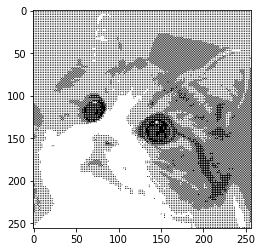

In [5]:
result1 = np.zeros((h,w))
result1[sample1 >= threshold] = 1
plt.imshow(result1, cmap='gray')

In [6]:
n = 2
I = np.array([[1, 2], [3, 0]], dtype = 'uint8')

for i in range(7):
    I2 = np.zeros((n*2, n*2))

    I2[0:n, 0:n] = I*4 + 1
    I2[0:n, n: ] = I*4 + 2
    I2[n: , 0:n] = I*4 + 3
    I2[n: , n: ] = I*4 + 0
    
    I = I2
    n*=2

I256 = I
I256.shape

(256, 256)

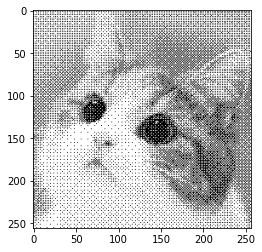

In [7]:
N = len(I256)
threshold = 255 * (I256 + 0.5) / (N * N)

h, w = sample1.shape
result2 = np.zeros((h,w))
result2[sample1 >= threshold] = 1
plt.imshow(result2, cmap='gray')

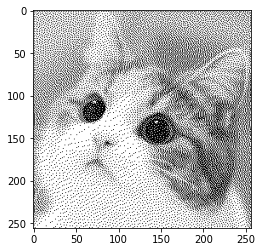

In [13]:
# Floyd Steinberg
result3 = np.copy(np.lib.pad(sample1,(1,1),'constant')) / 255

kernel = [[0, 0, 7/16],
        [3/16, 5/16, 1/16]]

ones = np.ones((2,3))

Height, Width = result3.shape

for y in range(1, Height-1):
    for x in range(1, Width-1):

        old_value = result3[y, x]
        new_value = 0
        if (old_value >= 0.5) :
            new_value = 1

        Error = old_value - new_value
        
        patch = result3[y:y+2, x-1:x+2]
        
        NewNumber = patch + Error * ones * kernel
        NewNumber[NewNumber>1] = 1
        NewNumber[NewNumber<0] = 0
        
        result3[y:y+2, x-1:x+2] = NewNumber
        result3[y, x] = new_value
            
result3 = result3[1:257, 1:257]
plt.imshow(result3, cmap='gray')

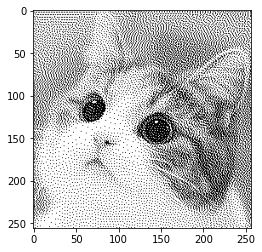

In [29]:
result4 = np.copy(np.lib.pad(sample1,(2,2),'constant')) / 255

kernel = np.array([[0, 0, 0, 7, 5],
         [3,5,7,5,3],
         [1,3,5,3,1]])/48

ones = np.ones((3,5))

Height, Width = result4.shape

for y in range(2, Height-2):
    for x in range(2, Width-2):

        old_value = result4[y, x]
        new_value = 0
        if (old_value >= 0.5) :
            new_value = 1

        Error = old_value - new_value
        
        patch = result4[y:y+3, x-2:x+3]
        
        NewNumber = patch + Error * ones * kernel
        NewNumber[NewNumber>1] = 1
        NewNumber[NewNumber<0] = 0
        
        result4[y:y+3, x-2:x+3] = NewNumber
        result4[y, x] = new_value
            
result4 = result4[2:258, 2:258]
plt.imshow(result4, cmap='gray')

(480, 480)


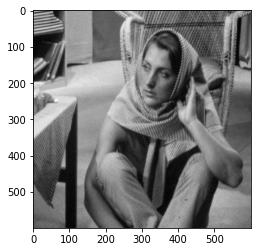

In [63]:
ratio = 0.8
sample_image = cv2.resize(sample2, dsize=[0,0], fx=ratio, fy=ratio)
print(sample_image.shape)
cv2.imwrite('r51.png', sample_image)
ratio = 1/ratio
sample_image = cv2.resize(sample_image, dsize=[0,0], fx=ratio, fy=ratio)

cv2.imwrite('r5.png', sample_image)
plt.imshow(sample_image, cmap='gray') 

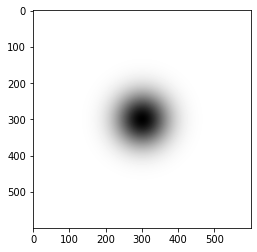

In [181]:
# https://www.donike.net/frequency-domain-of-images-fourier-transform-and-filtering/
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

plt.imshow(1-gaussianLP(50,img.shape), cmap='gray')

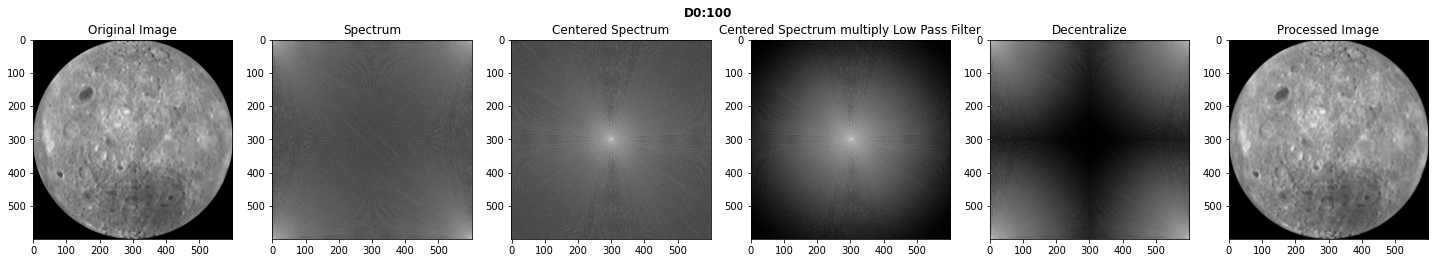

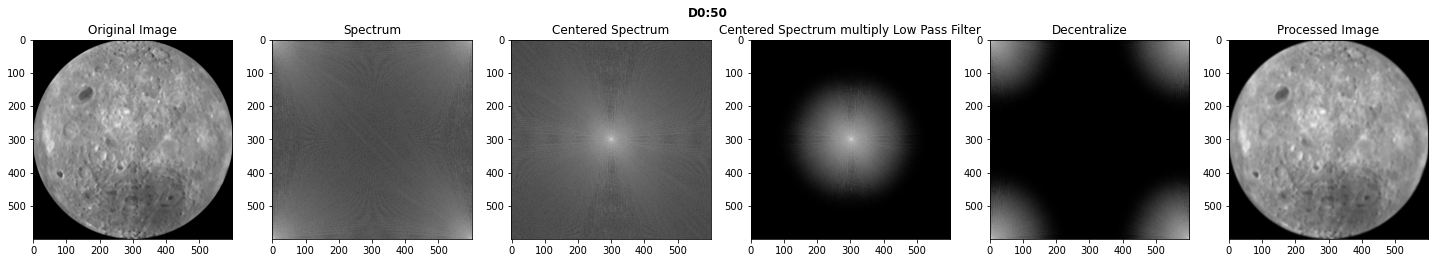

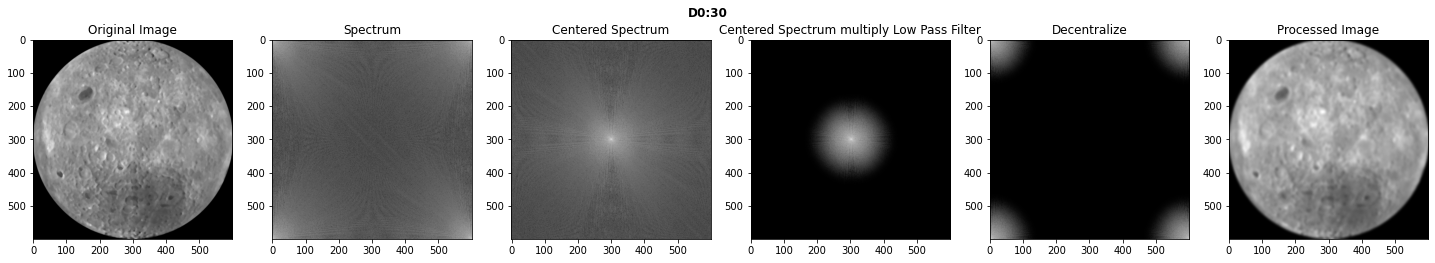

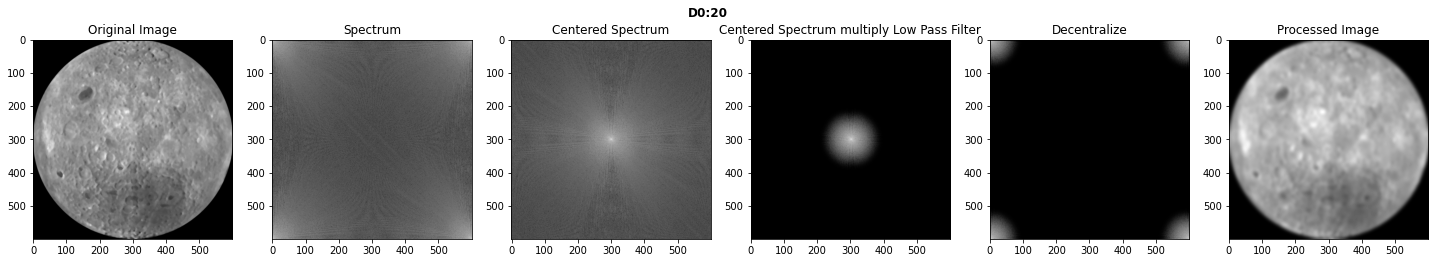

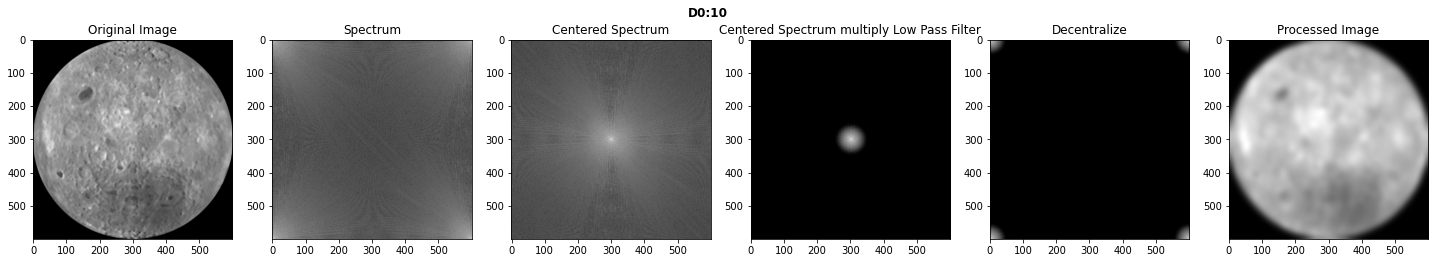

In [169]:
def try_d0s_lp(d0):
    plt.figure(figsize=(25, 5), constrained_layout=False)


    plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

    original = np.fft.fft2(img)
    plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

    center = np.fft.fftshift(original)
    plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

    LowPassCenter = center * gaussianLP(d0,img.shape)
    plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

    LowPass = np.fft.ifftshift(LowPassCenter)
    plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

    inverse_LowPass = np.fft.ifft2(LowPass)
    plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

    plt.suptitle("D0:"+str(d0),fontweight="bold")
    plt.subplots_adjust(top=1.1)
    plt.show()
    
    
for i in [100,50,30,20,10]:
    try_d0s_lp(i)

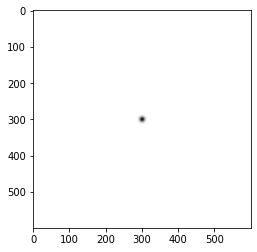

In [192]:
def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

plt.imshow(gaussianHP(5,img.shape), cmap='gray')

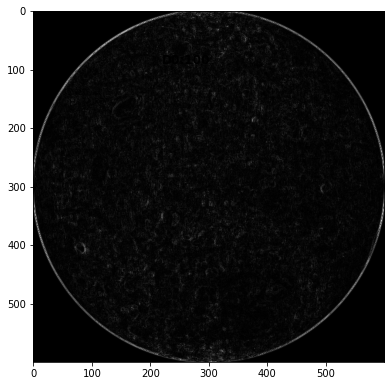

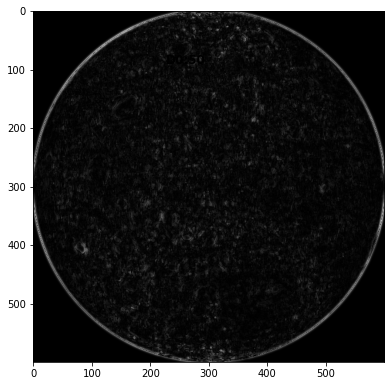

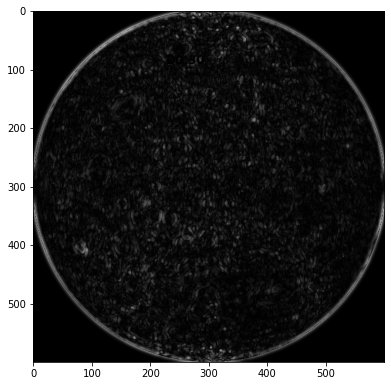

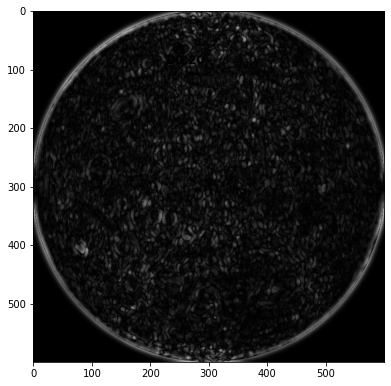

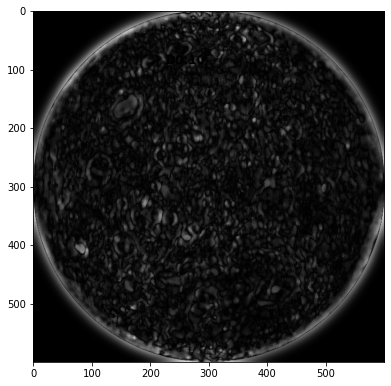

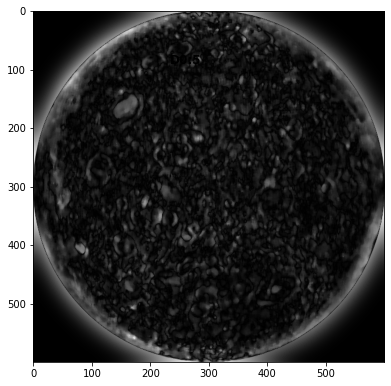

In [187]:
def try_d0s_hp(d0):
    plt.figure(figsize=(25, 5), constrained_layout=False)


#     plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

    original = np.fft.fft2(img)
#     plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

    center = np.fft.fftshift(original)
#     plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

    HighPassCenter = center * gaussianHP(d0,img.shape)
#     plt.subplot(164), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

    HighPass = np.fft.ifftshift(HighPassCenter)
#     plt.subplot(165), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

    inverse_HighPass = np.fft.ifft2(HighPass)
    plt.subplot(111), plt.imshow(np.abs(inverse_HighPass), "gray")#, plt.title("Processed Image")
    
    cv2.imwrite("D"+str(d0)+".png", np.abs(inverse_HighPass))

    plt.suptitle("D0:"+str(d0),fontweight="bold")
    plt.subplots_adjust(top=1.1)
    plt.show()
    
    
for i in [100,50,30,20,10,5]:
    try_d0s_hp(i)

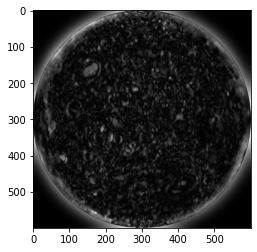

In [191]:
d0 = 5
original = np.fft.fft2(img) #傅立葉轉換
center = np.fft.fftshift(original) #將座標(0,0)轉到中心
HighPassCenter = center * gaussianHP(d0,img.shape) #乘以 high pass mask
HighPass = np.fft.ifftshift(HighPassCenter) #將座標轉回去
inverse_HighPass = np.fft.ifft2(HighPass) #做逆傅立葉轉換
result6 = np.abs(inverse_HighPass)
result6 = (result6-result6.min())/(result6.max()-result6.min())*255
plt.imshow(result6, "gray")